In [1]:
import pandas as pd

df = pd.read_excel("openfoodfacts_export.xlsx")  # mark as dataframe
df.head()


,code,lc,product_name_de,product_name_en,product_name_es,product_name_eu,product_name_fr,product_name_fy,product_name_pt,product_name_sv,...,off:environmental_score_grade,off:environmental_score_score,off:environmental_score_data.missing_key_data,off:environmental_score_data.agribalyse.code,off:environmental_score_data.adjustments.origins_of_ingredients.value,off:environmental_score_data.adjustments.packaging.value,off:environmental_score_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials,off:environmental_score_data.adjustments.production_system.value,off:environmental_score_data.adjustments.threatened_species.value,data_sources
0,722252130228,de,NaN,Chocolate Almond Fudge,NaN,NaN,"Barre énergétique Clif Bar - Avoine, Chocolat ...",NaN,NaN,NaN,...,unknown,NaN,1.0,NaN,0.0,-15.0,NaN,10.0,NaN,"App - yuka, Apps, App - Speisekammer"
1,5391532124254,de,NaN,Fulfil white chocolate Cookies & clean,NaN,NaN,NaN,NaN,NaN,NaN,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - macrofactor, Apps, App - smoothie-openfo..."
2,5060751994763,en,NaN,Nutty Chocolate Caramel,NaN,NaN,NaN,NaN,NaN,NaN,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - macrofactor, Apps, App - smoothie-openfo..."
3,855569110574,en,NaN,CHOCOLATE COVERED PEANUT BUTTER,NaN,NaN,NaN,NaN,NaN,NaN,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - Yuka, Apps, Labels, label-non-gmo-projec..."
4,8683851540875,en,NaN,Protein Bar,NaN,NaN,NaN,NaN,NaN,NaN,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - caloriecounterapp, Apps"


In [2]:
# List of columns to drop
cols_to_drop = [
    "product_name_de", "product_name_es", "product_name_eu", "product_name_fr",
    "product_name_fy", "product_name_pt", "product_name_sv", "product_name_tr",
    "ingredients_text_de", "ingredients_text_fr", "ingredients_text_sv", "ingredients_text_tr",
    "packaging_1_number_of_units", "packaging_1_shape", "packaging_1_material",
    "packaging_1_recycling", "packaging_1_quantity_per_unit", "packaging_1_weight_measured",
    "packaging_2_shape", "packaging_2_material", "link"
]

# Drop them safely (ignore errors in case some are missing)
df.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# Check remaining columns
df.head()


,code,lc,product_name_en,generic_name_en,generic_name_sv,quantity,serving_size,packaging,packaging_tags,brands,...,off:environmental_score_grade,off:environmental_score_score,off:environmental_score_data.missing_key_data,off:environmental_score_data.agribalyse.code,off:environmental_score_data.adjustments.origins_of_ingredients.value,off:environmental_score_data.adjustments.packaging.value,off:environmental_score_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials,off:environmental_score_data.adjustments.production_system.value,off:environmental_score_data.adjustments.threatened_species.value,data_sources
0,722252130228,de,Chocolate Almond Fudge,NaN,NaN,68g,68g,NaN,NaN,CLIF BAR,...,unknown,NaN,1.0,NaN,0.0,-15.0,NaN,10.0,NaN,"App - yuka, Apps, App - Speisekammer"
1,5391532124254,de,Fulfil white chocolate Cookies & clean,NaN,NaN,NaN,1 portion (55 g),NaN,NaN,Ferrero,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - macrofactor, Apps, App - smoothie-openfo..."
2,5060751994763,en,Nutty Chocolate Caramel,NaN,NaN,NaN,1.0 bsr (70.0 g),NaN,NaN,Optimum Nutrition,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - macrofactor, Apps, App - smoothie-openfo..."
3,855569110574,en,CHOCOLATE COVERED PEANUT BUTTER,NaN,NaN,NaN,1 bar (30 g),NaN,NaN,PERFECT BAR mini,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - Yuka, Apps, Labels, label-non-gmo-projec..."
4,8683851540875,en,Protein Bar,NaN,NaN,NaN,40.0g,NaN,NaN,Delly,...,unknown,NaN,1.0,NaN,-5.0,-15.0,NaN,0.0,NaN,"App - caloriecounterapp, Apps"


In [3]:
import pandas as pd

# Reload the dataset (if not already loaded)
df = pd.read_excel("openfoodfacts_export.xlsx")

# Define the core nutrient columns we care about
core_cols = [
    "energy-kcal_value", "energy-kcal_unit",
    "fat_value", "fat_unit",
    "saturated-fat_value", "saturated-fat_unit",
    "carbohydrates_value", "carbohydrates_unit",
    "sugars_value", "sugars_unit",
    "fiber_value", "fiber_unit",
    "proteins_value", "proteins_unit",
    "salt_value"
]

# Work only with these columns + keep some identifiers
id_cols = ["code", "product_name_en", "brands", "countries"]
subset = df[id_cols + core_cols].copy()

# --- Cleaning rules ---

# 1. Drop rows where energy-kcal_value == 0 or NaN
subset = subset[(subset["energy-kcal_value"].notna()) & (subset["energy-kcal_value"] != 0)]

# 2. Drop rows where proteins_value == 0 or NaN
subset = subset[(subset["proteins_value"].notna()) & (subset["proteins_value"] != 0)]

# 3. For other numeric nutrient fields, fill missing with 0
fill_cols = [
    "fat_value", "saturated-fat_value",
    "carbohydrates_value", "sugars_value",
    "fiber_value", "salt_value"
]
subset[fill_cols] = subset[fill_cols].fillna(0)

# --- Done cleaning ---
cleaned_df = subset.copy()

# Show how many rows are left
print(f"Rows after cleaning: {cleaned_df.shape[0]}")

# Optional: preview first few rows
cleaned_df.head()


Rows after cleaning: 309


,code,product_name_en,brands,countries,energy-kcal_value,energy-kcal_unit,fat_value,fat_unit,saturated-fat_value,saturated-fat_unit,carbohydrates_value,carbohydrates_unit,sugars_value,sugars_unit,fiber_value,fiber_unit,proteins_value,proteins_unit,salt_value
0,722252130228,Chocolate Almond Fudge,CLIF BAR,"Frankreich, Deutschland, Irland",404.0,kcal,9.0,g,1.9,g,63.000000,g,29.0,g,4.00,g,14.000000,g,0.5900
1,5391532124254,Fulfil white chocolate Cookies & clean,Ferrero,Irland,198.0,kcal,7.6,g,0.0,NaN,19.000000,g,0.0,NaN,4.00,g,18.000000,g,0.0975
2,5060751994763,Nutty Chocolate Caramel,Optimum Nutrition,"Ireland, United Kingdom",256.0,kcal,9.7,g,4.5,g,20.000000,g,6.2,g,11.00,g,20.000000,g,0.0000
3,855569110574,CHOCOLATE COVERED PEANUT BUTTER,PERFECT BAR mini,"Ireland, World",150.0,kcal,10.0,g,3.0,g,12.000000,g,8.0,g,2.00,g,5.000000,g,0.0875
4,8683851540875,Protein Bar,Delly,Ireland,362.5,kcal,10.5,g,7.0,g,40.250001,g,1.0,g,1.25,g,37.750001,g,0.0000


In [4]:
import numpy as np

# Avoid divide-by-zero; assumes your cleaned_df already exists
df_plot = cleaned_df.copy()

# Ensure numeric
for c in ["energy-kcal_value", "proteins_value"]:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# protein per 100 kcal = grams protein for every 100 kcal
df_plot["protein_per_100kcal"] = np.where(
    (df_plot["energy-kcal_value"] > 0),
    df_plot["proteins_value"] / (df_plot["energy-kcal_value"] / 100.0),
    np.nan
)

# Drop the row with the max protein_per_100kcal (clearly wrong)
df_plot = df_plot.drop(df_plot["protein_per_100kcal"].idxmax())

# Drop the row with the max energy-kcal_value (clearly wrong)
df_plot = df_plot.drop(df_plot["energy-kcal_value"].idxmax())


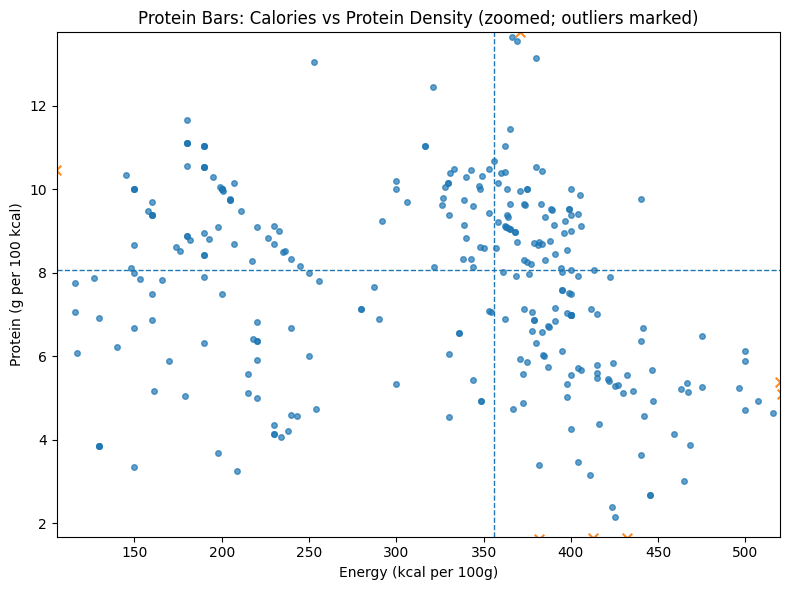

,product_name_en,brands,energy-kcal_value,protein_per_100kcal
135,Protein energy bar,Power Crunch,550.000000,5.909091
74,Salted caramel seed bars,Nine,530.000000,3.160377
187,Mocha Protein bar,Coles,521.052632,5.101010
101,Protein Bar,Gom gom,520.000000,5.384615
38,Chocolate Orange Energy Balls,Jo's Absolute Nutrition,432.000000,1.643519
248,Delly protein bar,Delly,412.500000,1.636364
90,Protein bar coconut,Fitness shock,400.000000,1.500000
194,Chia Energy Bombs,Jo's Absolute Nutrition,382.000000,1.623037
97,Protein bar 50% stracistella,Sportness,371.111111,13.772455
272,Almond protein Choc caramel bar flavour,Macro Mike,352.249985,14.904188


In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = df_plot["energy-kcal_value"]
Y = df_plot["protein_per_100kcal"]

# Robust limits using percentiles
x_lo, x_hi = np.percentile(X, [1, 99])
y_lo, y_hi = np.percentile(Y, [1, 99])

# Identify outliers relative to these limits (strictly outside)
is_outlier = (X < x_lo) | (X > x_hi) | (Y < y_lo) | (Y > y_hi)

# Medians for quadrant lines (data-driven)
x_thr = np.median(X[~np.isnan(X)])
y_thr = np.median(Y[~np.isnan(Y)])

fig, ax = plt.subplots(figsize=(8,6))

# Plot inliers first
ax.scatter(X[~is_outlier], Y[~is_outlier], alpha=0.7, s=16)

# Overlay outliers with larger markers so they’re visible
ax.scatter(X[is_outlier], Y[is_outlier], alpha=0.9, s=48, marker="x")

# Quadrant lines (using medians)
ax.axvline(x_thr, linestyle="--", linewidth=1)
ax.axhline(y_thr, linestyle="--", linewidth=1)

# Apply zoomed limits
ax.set_xlim(x_lo, x_hi)
ax.set_ylim(y_lo, y_hi)

ax.set_xlabel("Energy (kcal per 100g)")
ax.set_ylabel("Protein (g per 100 kcal)")
ax.set_title("Protein Bars: Calories vs Protein Density (zoomed; outliers marked)")

plt.tight_layout()
plt.show()

# Optional: print the outliers so you can inspect them
outliers_df = df_plot[is_outlier][["product_name_en","brands","energy-kcal_value","protein_per_100kcal"]]
display(outliers_df.sort_values("energy-kcal_value", ascending=False).head(10))


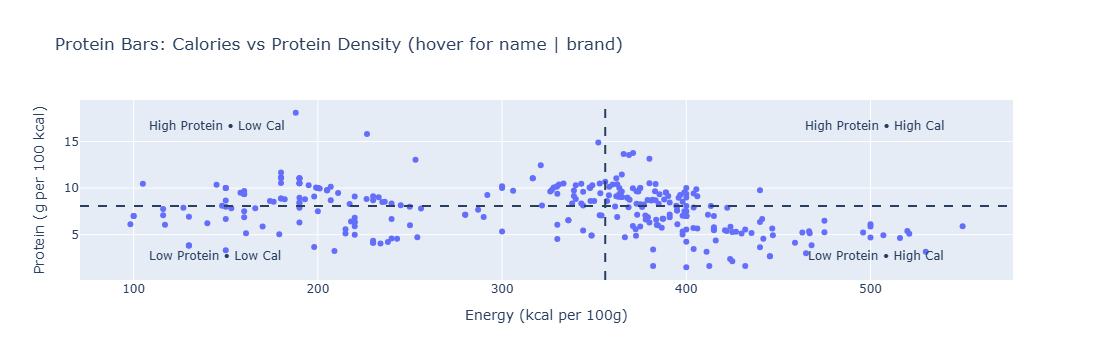

In [6]:
import numpy as np
import plotly.express as px

# ---------- prep ----------
# Combined hover label: "Product | Brand" (fallbacks if missing)
name = df_plot["product_name_en"].fillna(df_plot["brands"]).fillna(df_plot["code"].astype(str))
brand = df_plot["brands"].fillna("Unknown")
df_plot["hover_label"] = (name.astype(str) + " | " + brand.astype(str)).str.slice(0, 70)  # trim for neatness

# Axis thresholds (already computed earlier; recompute here if needed)
x_thr = float(np.median(df_plot["energy-kcal_value"]))
y_thr = float(np.median(df_plot["protein_per_100kcal"]))

# For placing quadrant labels, use data-driven corners with a small padding
x_min, x_max = float(df_plot["energy-kcal_value"].min()), float(df_plot["energy-kcal_value"].max())
y_min, y_max = float(df_plot["protein_per_100kcal"].min()), float(df_plot["protein_per_100kcal"].max())
pad_x = 0.02 * (x_max - x_min) if x_max > x_min else 1.0
pad_y = 0.02 * (y_max - y_min) if y_max > y_min else 0.1

# ---------- figure ----------
fig = px.scatter(
    df_plot,
    x="energy-kcal_value",
    y="protein_per_100kcal",
    hover_name="hover_label",        # drives %{hovertext}
    hover_data={},                   # don't include any extra fields
    title="Protein Bars: Calories vs Protein Density (hover for name | brand)"
)

# Quadrant lines
fig.add_vline(x=x_thr, line_dash="dash")
fig.add_hline(y=y_thr, line_dash="dash")

# Axes titles
fig.update_xaxes(title="Energy (kcal per 100g)")
fig.update_yaxes(title="Protein (g per 100 kcal)")

# Hover: show only the combined label (no x/y, no extra box)
fig.update_traces(hovertemplate="%{hovertext}<extra></extra>")

# ---------- quadrant text labels ----------
fig.add_annotation(x=x_min + pad_x, y=y_max - pad_y,
                   text="High Protein • Low Cal", showarrow=False, xanchor="left",  yanchor="top")
fig.add_annotation(x=x_max - pad_x, y=y_max - pad_y,
                   text="High Protein • High Cal", showarrow=False, xanchor="right", yanchor="top")
fig.add_annotation(x=x_min + pad_x, y=y_min + pad_y,
                   text="Low Protein • Low Cal",  showarrow=False, xanchor="left",  yanchor="bottom")
fig.add_annotation(x=x_max - pad_x, y=y_min + pad_y,
                   text="Low Protein • High Cal", showarrow=False, xanchor="right", yanchor="bottom")

fig.show()


In [7]:
import numpy as np
import pandas as pd

# Ensure thresholds exist (recompute if needed)
x_thr = float(np.median(df_plot["energy-kcal_value"]))
y_thr = float(np.median(df_plot["protein_per_100kcal"]))

# Display name for printing
display_name = (
    df_plot["product_name_en"]
    .fillna(df_plot["brands"])
    .fillna(df_plot["code"].astype(str))
)
df_tmp = df_plot.copy()
df_tmp["display_name"] = display_name

# Distance from the intersection (origin)
x = df_tmp["energy-kcal_value"].astype(float)
y = df_tmp["protein_per_100kcal"].astype(float)
df_tmp["dist_from_origin"] = np.sqrt((x - x_thr)**2 + (y - y_thr)**2)

# Quadrant conditions
cutting_q = (x < x_thr) & (y > y_thr)   # High protein, low calories
bulking_q = (x > x_thr) & (y > y_thr)   # High protein, high calories
worst_q   = (x > x_thr) & (y < y_thr)   # Low protein, high calories

def top5(df, mask, title):
    cols = ["display_name", "brands", "energy-kcal_value", "protein_per_100kcal", "dist_from_origin"]
    out = (df.loc[mask, cols]
             .sort_values("dist_from_origin", ascending=False)
             .head(5))
    print(f"\n{title} (furthest from origin in this quadrant):")
    if out.empty:
        print("  — no items in this quadrant —")
    else:
        # Neat formatting
        print(out.to_string(index=False, 
                            formatters={
                                "energy-kcal_value": "{:.0f}".format,
                                "protein_per_100kcal": "{:.2f}".format,
                                "dist_from_origin": "{:.2f}".format
                            }))
    return out

top5_cutting = top5(df_tmp, cutting_q, "Top 5 CUTTING (High Protein • Low Cal)")
top5_bulking = top5(df_tmp, bulking_q, "Top 5 BULKING (High Protein • High Cal)")
bottom5_worst = top5(df_tmp, worst_q,   "Bottom 5 WORST (Low Protein • High Cal)")



Top 5 CUTTING (High Protein • Low Cal) (furthest from origin in this quadrant):
                       display_name         brands energy-kcal_value protein_per_100kcal dist_from_origin
                        Protein bar          Linea               105               10.48           251.01
  Milk chocolate crunch protein bar         Fulfil               145               10.34           211.01
                        Proteín bar         Ritter               148                8.11           208.00
          Simply protein crispy bar Simply protein               150               10.00           206.01
Dark chocolate sea salt protein bar Simply protein               150               10.00           206.01

Top 5 BULKING (High Protein • High Cal) (furthest from origin in this quadrant):
                       display_name           brands energy-kcal_value protein_per_100kcal dist_from_origin
                    43% protein bar              NaN               440                9.77   

In [8]:
import numpy as np
from math import erf, sqrt

df_scored = df_plot.copy()  # start from your plotting DF (already has protein_per_100kcal)

def z_and_score(series, higher_is_better=True):
    """Return (z, score_0_100) where score is based on normal CDF of z.
       If higher_is_better=False, z is negated so lower values get higher scores."""
    s = pd.to_numeric(series, errors="coerce").astype(float)
    mu = np.nanmean(s)
    sigma = np.nanstd(s)
    if sigma == 0 or np.isnan(sigma):
        z = np.zeros_like(s)
    else:
        z = (s - mu) / sigma
    if not higher_is_better:
        z = -z
    # normal CDF mapping to 0..100: score = 100 * Phi(z)
    cdf = np.vectorize(lambda t: 0.5 * (1.0 + erf(t / sqrt(2.0))))
    score = 100.0 * cdf(z)
    return z, score

# Define the variables to score: (new_prefix, column_name, higher_is_better)
to_score = [
    ("kcal",      "energy-kcal_value",      False),  # lower kcal is better
    ("proteinpd", "protein_per_100kcal",    True ),  # higher protein density is better
    ("sugar",     "sugars_value",           False),  # lower sugar is better
    ("fiber",     "fiber_value",            True ),  # higher fiber is better
    ("satfat",    "saturated-fat_value",    False),  # lower sat fat is better
]

# Compute z & 0-100 score per variable
for prefix, col, hib in to_score:
    z, sc = z_and_score(df_scored[col], higher_is_better=hib)
    df_scored[f"z_{prefix}"] = z
    df_scored[f"score_{prefix}_0_100"] = sc

# Quick peek at the new columns
df_scored[[c for c in df_scored.columns if c.startswith("z_") or c.startswith("score_")]].head()


,z_kcal,score_kcal_0_100,z_proteinpd,score_proteinpd_0_100,z_sugar,score_sugar_0_100,z_fiber,score_fiber_0_100,z_satfat,score_satfat_0_100
0,-0.819547,20.623721,-1.705005,4.409675,-1.784279,3.718915,-0.569649,28.445778,0.801311,78.852417
1,1.149646,87.485507,0.530950,70.227319,0.936301,82.544083,-0.569649,28.445778,1.227078,89.010338
2,0.595213,72.414937,0.022829,50.910667,0.354660,63.857767,0.331931,63.002938,0.218682,58.655118
3,1.608487,94.613568,-1.757475,3.941841,0.185796,57.369761,-0.827244,20.404946,0.554814,71.048910
4,-0.422841,33.620575,1.056748,85.468661,0.842488,80.024249,-0.923842,17.778438,-0.341538,36.634939


In [9]:
import numpy as np
import pandas as pd

# ---- 1) Define editable weights (they will be normalized to sum to 1) ----
# Your current preference:
weights = {
    "score_kcal_0_100":      0.50,  # lower kcal better (already reflected in *_0_100)
    "score_proteinpd_0_100": 0.35,  # protein per 100 kcal
    "score_sugar_0_100":     0.06,  # lower sugar better
    "score_fiber_0_100":     0.06,  # higher fiber better
    "score_satfat_0_100":    0.03,  # lower sat fat better
}

# Helper: ensure all required score columns exist
missing = [k for k in weights.keys() if k not in df_scored.columns]
if missing:
    raise ValueError(f"Missing score columns: {missing}. "
                     f"Make sure you ran the z-score/score cell to create them.")

# Normalize weights to sum to 1 (so final score stays on 0–100 scale)
w_sum = sum(weights.values())
weights_norm = {k: v / w_sum for k, v in weights.items()} if w_sum != 0 else weights

# ---- 2) Compute the Cutting Score (0–100) ----
def compute_cutting_score(frame: pd.DataFrame, w: dict, out_col: str = "cutting_score_0_100"):
    # Weighted sum of component 0–100 scores
    comp = [frame[k].astype(float) * w[k] for k in w]
    frame[out_col] = np.sum(comp, axis=0)
    return frame

df_scored = compute_cutting_score(df_scored, weights_norm, out_col="cutting_score_0_100")

# ---- 3) Preview Top 10 by score ----
cols_show = [
    "product_name_en", "brands", "energy-kcal_value",
    "protein_per_100kcal", "sugars_value", "fiber_value", "saturated-fat_value",
    "cutting_score_0_100"
]
top10 = (df_scored
         .sort_values("cutting_score_0_100", ascending=False)
         .loc[:, [c for c in cols_show if c in df_scored.columns]]
         .head(10))

print("Top 10 bars by Cutting Score:")
print(top10.to_string(index=False, 
                      formatters={
                          "energy-kcal_value": "{:.0f}".format,
                          "protein_per_100kcal": "{:.2f}".format,
                          "sugars_value": "{:.1f}".format,
                          "fiber_value": "{:.1f}".format,
                          "saturated-fat_value": "{:.1f}".format,
                          "cutting_score_0_100": "{:.1f}".format
                      }))

# ---- 4) Save full scored list to CSV ----
out_path = "protein_bars_scored.csv"
df_scored.to_csv(out_path, index=False)
print(f"\nSaved full scored dataset to: {out_path}")

# Optional: also return the top10 DataFrame so you can inspect it easily in Jupyter
top10


Top 10 bars by Cutting Score:
                                       product_name_en            brands energy-kcal_value protein_per_100kcal sugars_value fiber_value saturated-fat_value cutting_score_0_100
               Twenty’s protein bar  chocolate brownie        Your  goal               188               18.09          0.9        30.0                 1.4                92.9
                                     Quest protein bar             Quest               180               11.11          1.0        14.0                 1.5                89.0
Sour watermelon cold pressed protein bar - Fibre Boost               NaN               227               15.81          0.3        44.7                 0.3                89.0
                                   No Cow  protein bar            No Cow               190               11.05          1.0        17.0                 1.0                88.7
                                     Quest protein bar             Quest               190

,product_name_en,brands,energy-kcal_value,protein_per_100kcal,sugars_value,fiber_value,saturated-fat_value,cutting_score_0_100
287,Twenty’s protein bar chocolate brownie,Your goal,188.000000,18.085106,0.880000,30.000000,1.400000,92.935507
143,Quest protein bar,Quest,180.000000,11.111111,1.000000,14.000000,1.500000,88.978625
158,Sour watermelon cold pressed protein bar - Fib...,NaN,226.666667,15.808824,0.333333,44.666667,0.333333,88.974959
297,No Cow protein bar,No Cow,190.000000,11.052632,1.000000,17.000000,1.000000,88.691453
212,Quest protein bar,Quest,190.000000,11.052632,1.000000,13.000000,0.000000,87.976885
33,Protein bar,Linea,105.000000,10.476190,1.300000,2.700000,2.500000,87.452015
181,Chocolate Chip Cookie Dough Protein Bar,Quest,190.000000,11.052632,1.000000,12.000000,2.500000,87.280827
144,Quest,Quest protein bar,180.000000,11.111111,0.000000,13.000000,33.000000,86.440401
211,Dark chocolate sea salt protein bar,Simply protein,150.000000,10.000000,1.000000,8.000000,1.000000,85.989895
208,Chocolate Deluxe Protein Bar,Pure Protein,180.000000,11.666667,4.000000,2.000000,3.500000,85.756266


In [10]:
import numpy as np
import pandas as pd

scores = df_scored["cutting_score_0_100"].astype(float)

# 1) Inspect candidate fixed thresholds (sanity check)
candidates = [50, 55, 60, 65, 70]
print("Fixed threshold → positive rate")
for t in candidates:
    pos_rate = (scores >= t).mean()
    print(f"  {t:>3}: {pos_rate: .2%}")

# 2) Percentile-driven thresholds (recommended)
target_pos_moderate = 0.35   # ~35% positives
target_pos_strict   = 0.25   # ~25% positives

# quantile q gives cutoff where q*100% of scores are <= cutoff,
# so positives ≈ (1 - q). We invert to get q.
q_moderate = 1 - target_pos_moderate
q_strict   = 1 - target_pos_strict

t_moderate = scores.quantile(q_moderate)
t_strict   = scores.quantile(q_strict)

print(f"\nPercentile thresholds:")
print(f"  Moderate (~35% pos): cutoff ≈ {t_moderate:.1f}")
print(f"  Strict   (~25% pos): cutoff ≈ {t_strict:.1f}")

# 3) Pick one to proceed (start moderate; you can change later)
cutoff = float(t_moderate)

# 4) Create the binary label
df_scored["cutting_label"] = (df_scored["cutting_score_0_100"] >= cutoff).astype(int)

# 5) Show class balance
n = len(df_scored)
pos = int(df_scored["cutting_label"].sum())
neg = n - pos
print(f"\nUsing cutoff {cutoff:.1f}:  positives={pos}  negatives={neg}  pos_rate={pos/n: .2%}")


Fixed threshold → positive rate
   50:  48.21%
   55:  40.39%
   60:  32.25%
   65:  26.38%
   70:  21.17%

Percentile thresholds:
  Moderate (~35% pos): cutoff ≈ 57.4
  Strict   (~25% pos): cutoff ≈ 65.9

Using cutoff 57.4:  positives=108  negatives=199  pos_rate= 35.18%


In [11]:
# Minimal supervised baseline: Logistic Regression with StratifiedKFold
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# --- 1) Define core features & target ---
features_core = [
    "energy-kcal_value",      # lower is better
    "protein_per_100kcal",    # higher is better
    "sugars_value",           # lower is better
    "fiber_value",            # higher is better
    "saturated-fat_value"     # lower is better
]
X = df_scored[features_core].copy()
y = df_scored["cutting_label"].astype(int).values

# --- 2) Pipeline: impute -> scale -> logistic regression ---
pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale",  StandardScaler()),
    ("clf",    LogisticRegression(
        class_weight="balanced",      # handle ~30% positives
        max_iter=200,
        solver="lbfgs",
        n_jobs=None
    ))
])

# --- 3) Stratified CV & metrics ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores  = cross_val_score(pipe, X, y, cv=cv, scoring="f1")
roc_scores = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc")

print(f"F1 (mean ± std):  {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"ROC-AUC (mean ± std): {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")

# --- 4) Fit once on all data for interpretability (coefficients) ---
pipe.fit(X, y)
clf = pipe.named_steps["clf"]

# Coefficients (after standardization)
coef = pd.Series(clf.coef_.ravel(), index=features_core).sort_values(key=abs, ascending=False)
print("\nFeature coefficients (standardized features):")
print(coef.to_frame("coef").to_string(float_format=lambda v: f"{v: .3f}"))


F1 (mean ± std):  0.924 ± 0.020
ROC-AUC (mean ± std): 0.990 ± 0.007

Feature coefficients (standardized features):
                      coef
energy-kcal_value   -3.990
protein_per_100kcal  2.361
fiber_value          0.861
sugars_value        -0.641
saturated-fat_value -0.160


In [12]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ---- 0) Ensure the pipeline exists & is fitted (or fit now on your data) ----
features_core = [
    "energy-kcal_value",      # kcal per 100g
    "protein_per_100kcal",    # derived below for new samples
    "sugars_value",
    "fiber_value",
    "saturated-fat_value"
]

def get_or_fit_pipeline(df_scored, y_col="cutting_label"):
    global pipe
    if "pipe" in globals() and hasattr(pipe, "predict_proba"):
        return pipe
    # build & fit a fresh one
    X = df_scored[features_core].copy()
    y = df_scored[y_col].astype(int).values
    pipe_local = Pipeline(steps=[
        ("impute", SimpleImputer(strategy="median")),
        ("scale",  StandardScaler()),
        ("clf",    LogisticRegression(class_weight="balanced", max_iter=200, solver="lbfgs"))
    ])
    pipe_local.fit(X, y)
    pipe = pipe_local
    return pipe

pipe = get_or_fit_pipeline(df_scored)

# Keep your decision cutoff (you picked 60 earlier)
CUTTING_SCORE_CUTOFF = 60.0  # used only to define the label; classifier returns probability

# ---- 1) Helper: predict a single new bar ----
def predict_bar(
    energy_kcal_per_100g: float,
    proteins_g_per_100g: float,
    sugars_g_per_100g: float,
    fiber_g_per_100g: float,
    satfat_g_per_100g: float,
    *,
    round_prob: int = 3
):
    """
    Predict cutting-friendliness for a new bar (values per 100g).
    Returns (probability_of_cutting, label_str).
    """
    # Compute protein density (g per 100 kcal), guard against zero/neg kcal
    if energy_kcal_per_100g <= 0:
        raise ValueError("energy_kcal_per_100g must be > 0")
    protein_per_100kcal = proteins_g_per_100g / (energy_kcal_per_100g / 100.0)

    # Build one-row DataFrame with the features the model expects
    row = pd.DataFrame([{
        "energy-kcal_value":      float(energy_kcal_per_100g),
        "protein_per_100kcal":    float(protein_per_100kcal),
        "sugars_value":           float(sugars_g_per_100g),
        "fiber_value":            float(fiber_g_per_100g),
        "saturated-fat_value":    float(satfat_g_per_100g),
    }], columns=features_core)

    # Predict probability for class 1 (cutting-friendly)
    prob = float(pipe.predict_proba(row)[0, 1])
    label = "CUTTING-FRIENDLY ✅" if prob >= 0.5 else "Not cutting-friendly ❌"
    return round(prob, round_prob), label

# ---- 2) Example demos ----
# Example A: lean, high-protein, low-sugar bar (per 100g)
prob_a, label_a = predict_bar(
    energy_kcal_per_100g=320,
    proteins_g_per_100g=30,
    sugars_g_per_100g=3,
    fiber_g_per_100g=10,
    satfat_g_per_100g=2
)
print("Example A:", prob_a, label_a)

# Example B: higher kcal, higher sugar, lower fiber
prob_b, label_b = predict_bar(
    energy_kcal_per_100g=450,
    proteins_g_per_100g=18,
    sugars_g_per_100g=20,
    fiber_g_per_100g=2,
    satfat_g_per_100g=6
)
print("Example B:", prob_b, label_b)


Example A: 0.583 CUTTING-FRIENDLY ✅
Example B: 0.0 Not cutting-friendly ❌


In [13]:
# Save
import joblib
joblib.dump(pipe, "cutting_classifier.joblib")

# Load later (in a new session / script)
# pipe = joblib.load("cutting_classifier.joblib")


['cutting_classifier.joblib']

In [15]:
def quick_cli():
    print("Enter nutrition per 100g:")
    kcal = float(input("Energy kcal: "))
    prot = float(input("Protein g: "))
    sug  = float(input("Sugar g: "))
    fib  = float(input("Fiber g: "))
    sat  = float(input("Saturated fat g: "))
    prob, label = predict_bar(kcal, prot, sug, fib, sat)
    print(f"\nPrediction: {label}  (prob={prob})")

quick_cli()  # uncomment to use interactively


Enter nutrition per 100g:


Energy kcal:  350
Protein g:  20
Sugar g:  4.5
Fiber g:  3
Saturated fat g:  1.5



Prediction: Not cutting-friendly ❌  (prob=0.006)
